In [250]:
from Bucket import Bucket
import os
import json

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [251]:
bucket_path = '../private/result-buckets/'
grade_vs_salary = '../private/grade-vs-salary.json'
grade_vs_attendance = '../private/grade-vs-attendance.json'
TERM = ['1a', '1b', '2a', '2b', '3a', '3b', '4a']

In [252]:
def process_file(filename):
    with open(bucket_path + filename, 'r') as f:
        f = json.loads(f.read())
        b = Bucket.create_from_bucket(filename.replace('_buckets.json', ''), f)
        render_file(b)

In [253]:
def render_file(b):
    fig = plt.figure(figsize=(18, 16))    
    
    ax1 = fig.add_subplot(211)
    cols = []
    for val in b:
        if type(b[val]) == dict and 'message' in b[val]:
            continue
        cols.append(val)
        salaries = []

        salaries = [s.mean() for s in b[val].salaries]
        ax1.plot([1, 2, 3, 4, 5, 6], salaries) # add 7 for term
    ax1.legend(cols, loc='upper left')
    plt.show()

In [254]:
for i in os.listdir(bucket_path):
    if i.startswith('.'):
        continue
#    process_file(i)

In [255]:
def render_grade_vs_salary(data, term, axis='cumulative_avg'):
    """Creates a scatter plot of the data of a term.
    
    `axis` represents the x axis that's plotted against salary.
    """
    x = []
    y = []
    for salary in data:
        for item in data[salary]:
            x.append(item[axis])
            y.append(item['result_salary'])
    plt.xlim(60, 100)
    plt.scatter(x, y)
    print('Term: ' + term)
    print(np.corrcoef(x, y)[0, 1])
#    plt.show()

Term: 1
0.2364562021650012
Term: 2
0.23161596874707194
Term: 3
0.18636222829213395
Term: 4
0.09514875558789497
Term: 5
0.18395857015444955
Term: 6
-0.05676787581307533


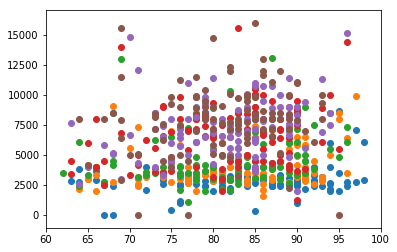

In [256]:
with open(grade_vs_salary, 'r') as f:
    data = json.loads(f.read())
    for term in range(1, len(data)+1):
        render_grade_vs_salary(data[str(term)], str(term))

In [257]:
from scipy.interpolate import interp1d
import math

In [248]:
def render_grade_vs_attendance(data, term):
    x = []
    y = []
    legend = []
    max_val = []
    for i in range(1, 5):
        rating = data.get(str(i), [])
        grades = [0] * 6
        for g in rating:
            if g < 60 or g == 'exchange':
                continue
            index = int(math.floor((float(g) - 60) / (40.0 / 6))) # Normalize to range 0-7
            grades[index] += 1
        if sum(grades) < 5:
            continue
        legend.append(i)
        grades = list(map(lambda x: float(x) / sum(grades) * 100, grades))

        x = [num for num in range(60, 100, 7)]
        f = interp1d(x, grades, kind='cubic', fill_value='extrapolate')
        xnew = np.linspace(63, 100, num=40)
        max_val.append(max(f(xnew)))
        plt.plot(xnew, f(xnew))
        
    plt.xlim(60, 100)
    plt.ylim(0, 60)
    plt.legend(legend)
#    plt.show()

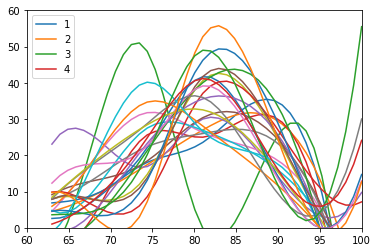

In [249]:
with open(grade_vs_attendance, 'r') as f:
    data = json.loads(f.read())
    for t in TERM:
        render_grade_vs_attendance(data[t], t)